In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [43]:
#importing the four data sets
orders = pd.read_csv(r"C:\Users\AMIRA HABIBA ADAMU\Desktop\tech crush boothcamp\Pizza-Place-Sales\pizza_sales\orders.csv", encoding = "latin1")
order_details = pd.read_csv(r"C:\Users\AMIRA HABIBA ADAMU\Desktop\tech crush boothcamp\Pizza-Place-Sales\pizza_sales\order_details.csv", encoding = "latin1")
pizzas = pd.read_csv(r"C:\Users\AMIRA HABIBA ADAMU\Desktop\tech crush boothcamp\Pizza-Place-Sales\pizza_sales\pizzas.csv", encoding = "latin1")
pizza_types = pd.read_csv(r"C:\Users\AMIRA HABIBA ADAMU\Desktop\tech crush boothcamp\Pizza-Place-Sales\pizza_sales\pizza_types.csv", encoding = "latin1")


In [44]:
#checking the orders dataset
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [45]:
#checking the order_details dataset
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [46]:
#checking the pizza data set
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [47]:
#checking the pizza_types dataset
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [48]:
#cheking the overall information for any error for all the data sets imported
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [49]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [50]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [51]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [52]:
#merging the four datasets to one for easy analysis
df = order_details.merge(orders, on = "order_id")\
    .merge(pizzas, on = "pizza_id")\
    .merge(pizza_types, on = "pizza_type_id")

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [53]:
#checking the dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [54]:
#checking for null values 
df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [55]:
#changing the datatype for date and time column to the correct datatype
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [57]:
#creating new columns 
df["revenue"] = df["quantity"] * df["price"]
df["hour"] = df["time"].dt.hour
df["weekday"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()

In [58]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue,hour,weekday,month
0,1,1,hawaiian_m,1,2015-01-01,2026-02-15 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-15 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,2026-02-15 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,2026-02-15 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,2026-02-15 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January


* Total Revenue:
the total revenue generated over the period is 817860.05, indicating the overall financial performance of the pizzeria

In [59]:
# calculating the total revenue 
df["revenue"].sum()

np.float64(817860.0499999999)

* total quantity sold:
A total of 49574 pizzas were sold, showing the scale of operations and customer demand.

In [60]:
#calculating the total quantity sold
df["quantity"].sum()

np.int64(49574)

* Total number of orders:
There were 21350 unique orders, highlighting the number of transactions processed.

In [61]:
#calculating the total number of orders
df["order_id"].nunique()

21350

* Number of pizza types sold:
32 different pizza types were sold, demonstrating the variety offered to customers.

In [62]:
#number of pizza types sold
df["pizza_type_id"].nunique()

32

* Average pizza price:
The average price per pizza was 16.494, which can guide future pricing strategies.

In [63]:
#calculating the average pizza price 
df["price"].mean()

np.float64(16.494132044426163)

* Peak hour of sales:
sales peaked at 12:00, suggesting this is the busiest hour and may require additional staffing.

In [64]:
#checking the peak hour of sales
df.groupby("hour")["revenue"].sum().sort_values(ascending =  False)

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: revenue, dtype: float64

* sales per day of the week:
The highest revenue occurred on Friday, which could inform marketing campaigns and promotions.

In [65]:
#checking the sales per day of the week
df.groupby("weekday")["revenue"].sum().sort_values(ascending = False)

weekday
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

* top 5 bestselling pizzas:
The top 5 pizzas in demand reveal the customer's preferences.

In [66]:
#top 5 bestselling pizzas
df.groupby("name")["quantity"].sum().sort_values(ascending = False).head()

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

* monthly sales trend: revenue was highest in July, indicating seasonal trends or promotional effectiveness.

In [67]:
#monthly sales trend
df.groupby("month")["revenue"].sum().sort_values()

month
October      64027.60
September    64180.05
December     64701.15
February     65159.60
June         68230.20
August       68278.25
April        68736.80
January      69793.30
November     70395.35
March        70397.10
May          71402.75
July         72557.90
Name: revenue, dtype: float64

* Pizza types not doing well:
the lowest-salling pizza is "the Brie Carre Pizza" suggesting potential menu adjustments or tergeted promotions.

In [68]:
# pizza types not doing well
df.groupby("name")["quantity"].sum().sort_values().head(10)

name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64

In [69]:
#define a function that assigns a category
def categorize_pizza(ingredients):
    ingredients = ingredients.lower() # make it case-insensitive
    if "pepperoni" in ingredients or "chicken" in ingredients or "meat" in ingredients:
        return "Meat"
    elif "veggie" in ingredients or "vegetarian" in ingredients:
        return "Vegetarian"
    elif "cheese" in ingredients or "four cheese" in ingredients:
        return "Cheese"
    elif "margherita" in ingredients:
        return "Vegetarian"
    else:
        return "Others"

In [70]:
# Apply it to the name column using .map()
df["category"] = df["ingredients"].map(categorize_pizza)
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue,hour,weekday,month
0,1,1,hawaiian_m,1,2015-01-01,2026-02-15 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Cheese,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-15 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Meat,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,2026-02-15 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Cheese,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,2026-02-15 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Others,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,2026-02-15 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Others,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January


The pizza category 'Meat' generated the most revenue, suggesting that customers prefer their pizzas with meat in it 

In [71]:
#revenue by pizza category
df.groupby("category")["revenue"].sum().sort_values(ascending = False)

category
Meat      346871.00
Cheese    283779.80
Others    187209.25
Name: revenue, dtype: float64

On average, each order brought in 38.307, which can guide upselling or combo strategies

In [72]:
#average revenue per order
df.groupby("order_id")["revenue"].sum().mean()

np.float64(38.30726229508197)

In [73]:
#hourly sales heatmap(hour x day) and also replace missing values with 0
sales_heatmap = df.pivot_table(index = "hour", columns = "weekday", values = "revenue", aggfunc = "sum", fill_value = 0)
sales_heatmap

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
9,0.00,0.00,0.00,0.00,0.00,83.00,0.00
10,0.00,50.25,52.75,37.50,86.50,0.00,76.65
11,6449.30,7767.00,3335.55,3818.75,7731.65,7147.05,8686.50
12,18227.05,18596.10,10299.80,9988.80,19042.20,18364.85,17359.10
13,17144.55,13292.20,13001.15,11452.95,18807.10,16889.00,15478.75
14,8583.45,7614.80,8646.40,8466.70,9423.10,8084.65,8382.30
15,7182.05,6868.80,8671.55,8075.85,7594.30,6922.50,7677.25
16,9642.15,8907.75,10588.10,10092.25,10795.05,10449.70,9580.40
17,12622.40,11893.70,12107.60,11776.30,14064.55,10980.50,12792.40


* Revenue is highest on Thursday around 12, suggesting optimal delivery or staffing times.

In [74]:
#sort weekday values correctly
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sales_heatmap = sales_heatmap[weekday_order]

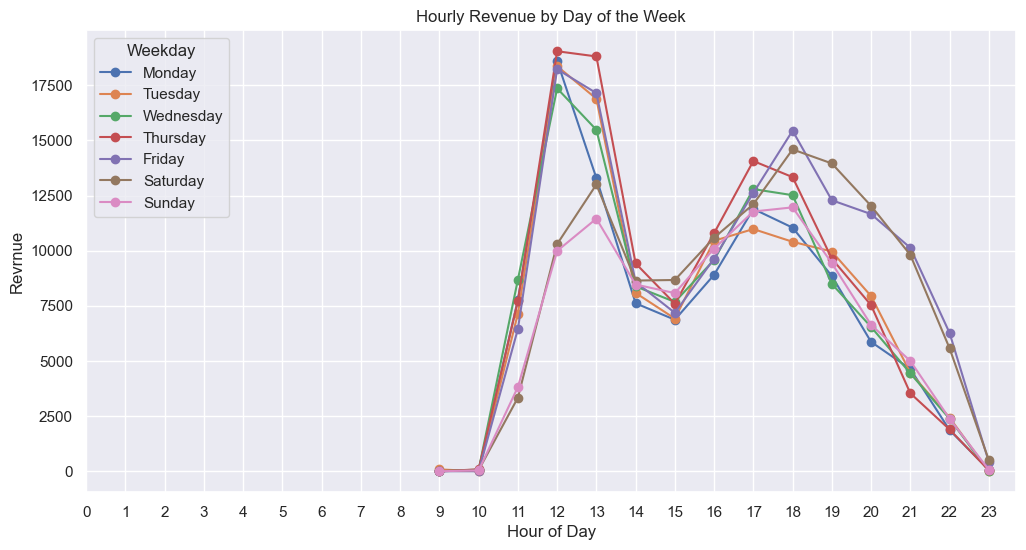

In [82]:
plt.figure(figsize = (12,6))
for day in weekday_order:
    plt.plot(sales_heatmap.index, sales_heatmap[day], marker = 'o', label = day)
plt.title("Hourly Revenue by Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Revrnue")
plt.xticks(range(0,24))
plt.legend(title = "Weekday")
plt.grid(True)
plt.savefig("assignament 1.png", dpi = 300, bbox_inches = "tight")
plt.show()

* Above is a line plot visualising the revenue and the hour of the day it was the highest 

In [76]:
#correlation between price and quantity sold
correlation = df[["price", "quantity"]].corr()
correlation

,price,quantity
price,1.000000,0.007142
quantity,0.007142,1.000000


* The correlation between price and quantity above and its heatmap below indicating that higher prices may (or may not)affect sales volume.

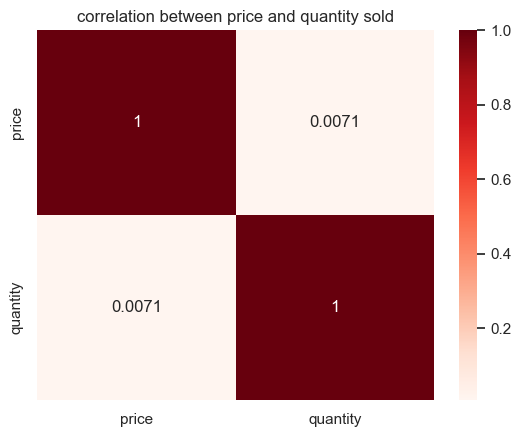

In [81]:
#creating a heatmap 
sns.heatmap(correlation, annot = True, cmap = "Reds")
plt.title("correlation between price and quantity sold")
plt.savefig("assignament 2.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [78]:
#monthly growth rate
monthly_revenue = df.groupby("month")["revenue"].sum()
monthly_growth = monthly_revenue.pct_change() * 100

The revenue growth fluctuation from one month to the next, indicating seasonality or marketing impact

In [79]:
monthly_revenue

month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: revenue, dtype: float64

In [80]:
monthly_growth

month
April             NaN
August      -0.667110
December    -5.239004
February     0.708565
January      7.111308
July         3.961125
June        -5.964478
March        3.175866
May          1.428539
November    -1.410870
October     -9.045697
September    0.238100
Name: revenue, dtype: float64